In [21]:
"""
Author: Praveen Dominic
"""
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Lambda, Flatten, Dense
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K
import os
import numpy as np
from numpy import genfromtxt
import pandas as pd
import tensorflow as tf
import PIL

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from tensorflow import keras
model=keras.models.load_model('/content/drive/MyDrive/DL/CNN/Face_recognition/facenet_keras.h5')
model

In [5]:
print(model.inputs)
print(model.outputs)

[<KerasTensor: shape=(None, 160, 160, 3) dtype=float32 (created by layer 'input_1')>]
[<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'Bottleneck_BatchNorm')>]


In [6]:
FRmodel = model

In [7]:
#tf.keras.backend.set_image_data_format('channels_last')
import numpy as np
def img_to_encoding(image_path, model):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(160, 160))
    img = np.around(np.array(img) / 255.0, decimals=12)
    x_train = np.expand_dims(img, axis=0)
    embedding = model.predict_on_batch(x_train)
    return embedding / np.linalg.norm(embedding, ord=2)

In [8]:
database = {}
database['dominic'] = img_to_encoding("/content/drive/MyDrive/DL/CNN/Face_recognition/images/dominic.png", FRmodel)
database['mary'] = img_to_encoding("/content/drive/MyDrive/DL/CNN/Face_recognition/images/mary.png", FRmodel)
database['patrick'] = img_to_encoding("/content/drive/MyDrive/DL/CNN/Face_recognition/images/patrick.png", FRmodel)
database['jesus'] = img_to_encoding("/content/drive/MyDrive/DL/CNN/Face_recognition/images/jesus.png", FRmodel)

Load the images of Danielle and Kian: 

In [9]:
jesus = tf.keras.preprocessing.image.load_img("/content/drive/MyDrive/DL/CNN/Face_recognition/images/jesus.png", target_size=(160, 160))
patrick = tf.keras.preprocessing.image.load_img("/content/drive/MyDrive/DL/CNN/Face_recognition/images/patrick.png", target_size=(160, 160))

In [10]:
np.around(np.array(jesus) / 255.0, decimals=12).shape

(160, 160, 3)

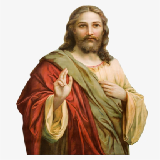

In [11]:
jesus

In [12]:
np.around(np.array(patrick) / 255.0, decimals=12).shape

(160, 160, 3)

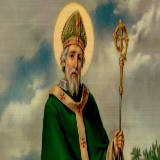

In [13]:
patrick

In [14]:
def verify(image_path, identity, database, model):
    #Compute the encoding for the image. Use img_to_encoding() see example above. (≈ 1 line)
    encoding = img_to_encoding(image_path, model)
    #Compute distance with identity's image (≈ 1 line)
    dist = np.linalg.norm(database[identity] - encoding, 2)
    #Open the door if dist < 0.7, else don't open (≈ 3 lines)
    if dist < 0.7:
        print("It's " + str(identity) + ", welcome in!")
        door_open = True
    else:
        print("It's not " + str(identity) + ", please go away")
        door_open = False
    ### END CODE HERE        
    return dist, door_open

In [15]:
verify("/content/drive/MyDrive/DL/CNN/Face_recognition/images/mary.png", "mary", database, FRmodel)

It's mary, welcome in!


(0.0, True)

In [18]:
verify("/content/drive/MyDrive/DL/CNN/Face_recognition/images/patrick.png", "patrick", database, FRmodel)

It's patrick, welcome in!


(0.0, True)

In [22]:
def who_is_it(image_path, database, model):
    encoding =  img_to_encoding(image_path, model)
    min_dist = 100
    
    for (name, db_enc) in database.items():
        dist = np.linalg.norm(db_enc - encoding, 2)
        if dist < min_dist:
            min_dist = dist
            identity = name
    
    if min_dist > 0.7:
        print("Not in the database.")
    else:
        print ("it's " + str(identity) + ", the distance is " + str(min_dist))
        
    return min_dist, identity

In [24]:
who_is_it("/content/drive/MyDrive/DL/CNN/Face_recognition/images/jesus2.png", database, FRmodel)

it's jesus, the distance is 0.4636312


(0.4636312, 'jesus')